## Downloading the dataset

```
!wget https://s3.embl.de/spatialdata/spatialdata-sandbox/mibitof.zip
!unzip mibitof.zip
!mv data.zarr mibitof.zarr
```

## Dataset References

- Hartmann, F. J. et al. Single-cell metabolic profiling of human cytotoxic T cells. Nat. Biotechnol. (2020) doi:10.1038/s41587-020-0651-8.

In [1]:
import matplotlib.pyplot as plt
import spatialdata as sd
import spatialdata_plot as _

import squidpy as sq

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
mibitof_sdata = sd.read_zarr("mibitof.zarr")
mibitof_sdata

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /Users/selman/projects/squidpy/docs/notebooks/examples/preprocessing/mibitof.zarr
├── Images
│     ├── 'point8_image': DataArray[cyx] (3, 1024, 1024)
│     ├── 'point16_image': DataArray[cyx] (3, 1024, 1024)
│     └── 'point23_image': DataArray[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': DataArray[yx] (1024, 1024)
│     ├── 'point16_labels': DataArray[yx] (1024, 1024)
│     └── 'point23_labels': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3309, 36)
with coordinate systems:
    ▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
    ▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
    ▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

In [3]:
mibitof_sdata_filtered = sq.pp.filter_cells(mibitof_sdata, min_counts=0, inplace=False)
mibitof_sdata_filtered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 


/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:91: UserWarning: Key `point16_labels` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:91: UserWarning: Key `point23_labels` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:91: UserWarning: Key `point8_labels` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._share

SpatialData object
├── Images
│     ├── 'point8_image': DataArray[cyx] (3, 1024, 1024)
│     ├── 'point16_image': DataArray[cyx] (3, 1024, 1024)
│     └── 'point23_image': DataArray[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': DataArray[yx] (1024, 1024)
│     ├── 'point16_labels': DataArray[yx] (1024, 1024)
│     └── 'point23_labels': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (1701, 36)
with coordinate systems:
    ▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
    ▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
    ▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

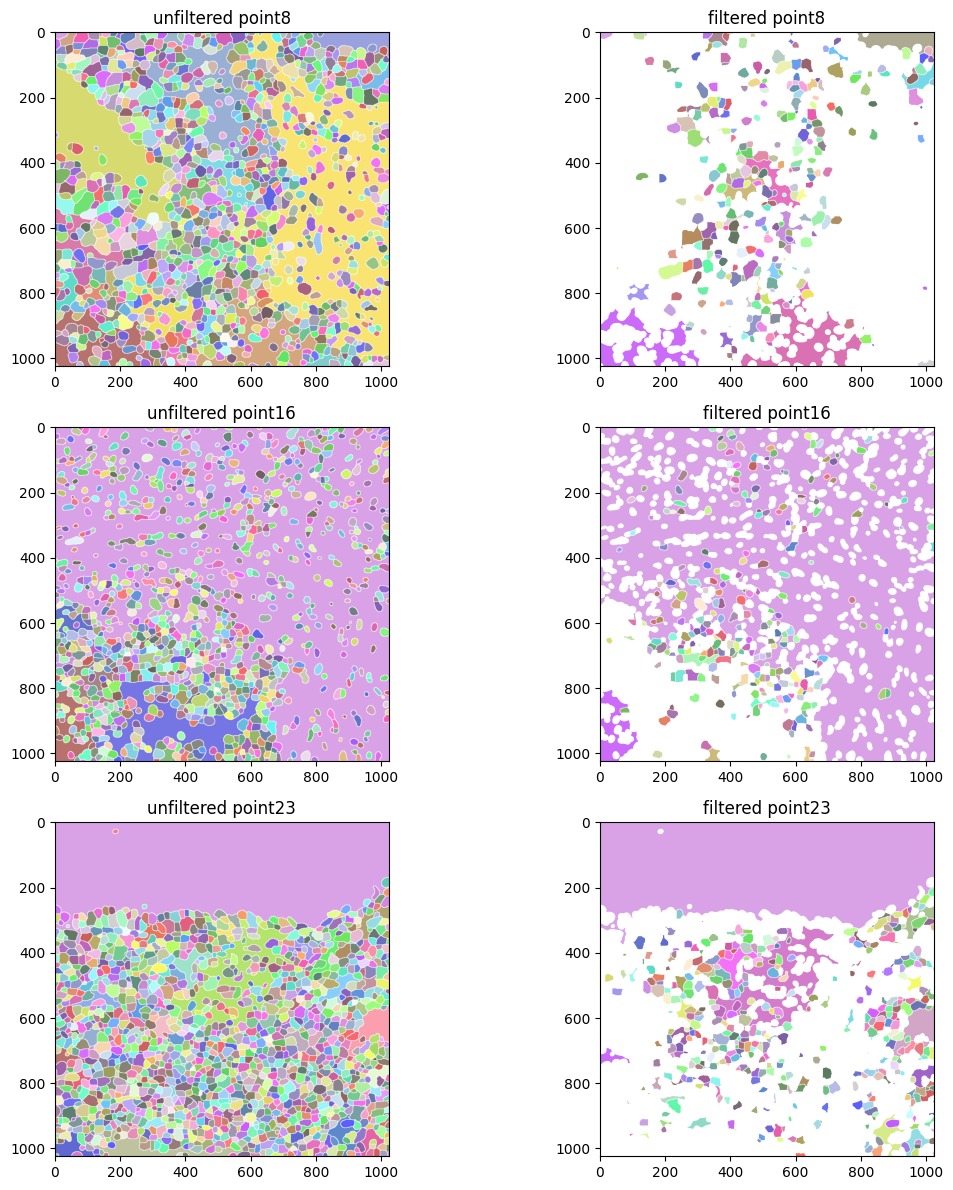

In [4]:

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12, 12))


mibitof_8 = mibitof_sdata.filter_by_coordinate_system("point8")
mibitof_8_filtered = mibitof_sdata_filtered.filter_by_coordinate_system("point8")
mibitof_8.pl.render_labels().pl.show(ax=axs[0, 0], title="unfiltered point8")
mibitof_8_filtered.pl.render_labels().pl.show(ax=axs[0, 1], title="filtered point8")

mibitof_16 = mibitof_sdata.filter_by_coordinate_system("point16")
mibitof_16_filtered = mibitof_sdata_filtered.filter_by_coordinate_system("point16")
mibitof_16.pl.render_labels().pl.show(ax=axs[1, 0], title="unfiltered point16")
mibitof_16_filtered.pl.render_labels().pl.show(ax=axs[1, 1], title="filtered point16")

mibitof_23 = mibitof_sdata.filter_by_coordinate_system("point23")
mibitof_23_filtered = mibitof_sdata_filtered.filter_by_coordinate_system("point23")
mibitof_23.pl.render_labels().pl.show(ax=axs[2, 0], title="unfiltered point23")
mibitof_23_filtered.pl.render_labels().pl.show(ax=axs[2, 1], title="filtered point23")



plt.tight_layout()